Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9039 - loss: 0.3107 - val_accuracy: 0.9833 - val_loss: 0.0482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9855 - loss: 0.0462 - val_accuracy: 0.9868 - val_loss: 0.0404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9876 - val_loss: 0.0358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9912 - val_loss: 0.0299
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9880 - loss: 0.0410

Test Accuracy: 99.12%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


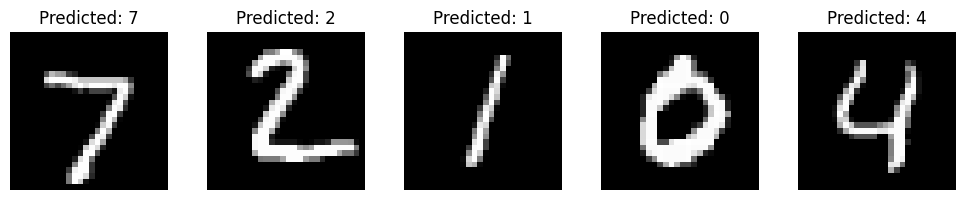

In [3]:
# Task 2: MNIST Digit Classification using TensorFlow (CNN)

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 3: Normalize the images (0–255 to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Reshape the data for CNN input (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 5: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Step 9: Visualize predictions for 5 test images
predictions = model.predict(x_test)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


![image.png]()